# **1. Understanding the Problem and Business Objectives**

- **Define the problem to solve:**  
  - Clearly understand the project's objectives (e.g., identifying factors influencing churn).  
- **Estimated Loss Profit by Churn:**  
  - RevenueEstimate=Mean(EstimatedSalary for NumOfProducts)+(Balance×0.02)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = r"/content/drive/MyDrive/MINH THÀNH 21416C/1. Code/Code Server/Data/1_df_train.csv"
df = pd.read_csv(file_path)
df_train = df.copy()
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
# product_revenue_analysis = df_train.groupby("NumOfProducts")[["Balance", "EstimatedSalary"]].mean().reset_index()
# product_revenue_analysis

In [ ]:
# # RevenueEstimate=Mean(EstimatedSalary for NumOfProducts)+(Balance×0.02)
# salary_per_product = product_revenue_analysis.set_index("NumOfProducts")["EstimatedSalary"].to_dict()
# salary_per_product

In [ ]:
# df_train["RevenueEstimate"] = (df_train["NumOfProducts"] * 10000) + (df_train["Balance"]) + (df_train["EstimatedSalary"] * 0.2)
df_train["RevenueEstimate"] =  (df_train["Balance"]) + (df_train["EstimatedSalary"] * 0.2) # quy tắc 5 chiếc lọ --- gửi/ tiết kiệm/ deposit

# Tính tổng RevenueEstimate của khách hàng đã rời bỏ (Exited = 1)
total_revenue_churn = df_train[df_train['Exited'] == 1]["RevenueEstimate"].sum()
total_revenue_churn

np.float64(3285733561.8320003)

In [ ]:
total_revenue_non_churn = df_train[df_train['Exited'] == 0]["RevenueEstimate"].sum()
total_revenue_non_churn

np.float64(9585771655.88594)

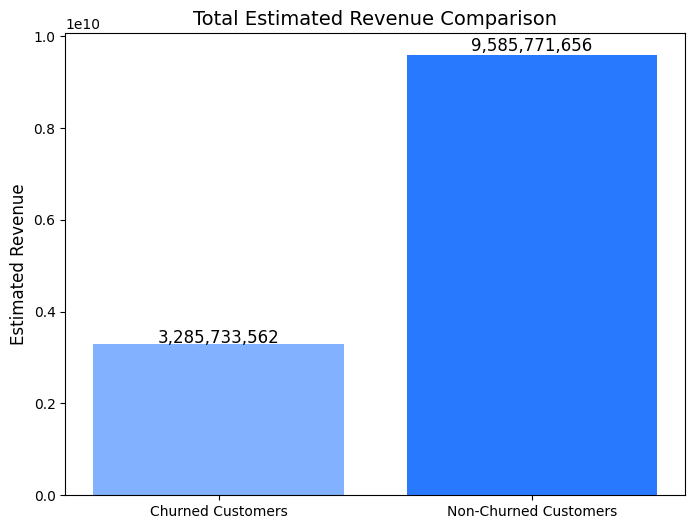

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8, 6))
categories = ['Churned Customers', 'Non-Churned Customers']
values = [total_revenue_churn, total_revenue_non_churn]

# Đổi màu cột
ax.bar(categories, values, color=["#82b1ff", "#2979ff"])

# Ghi giá trị trên cột
for i, v in enumerate(values):
    ax.text(i, v + (v * 0.01), f"{v:,.0f}", ha='center', fontsize=12)

# Thiết lập tiêu đề và nhãn
ax.set_title("Total Estimated Revenue Comparison", fontsize=14)
ax.set_ylabel("Estimated Revenue", fontsize=12)

# Hiển thị biểu đồ
plt.show()


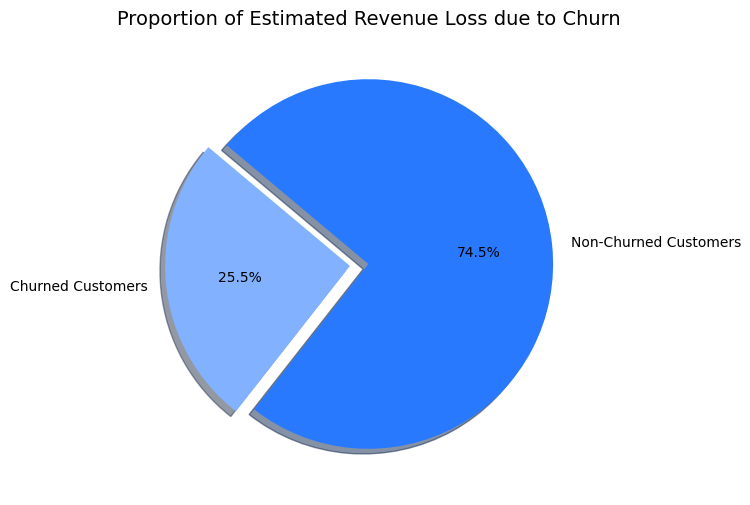

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu
labels = ['Churned Customers', 'Non-Churned Customers']
sizes = [total_revenue_churn, total_revenue_non_churn]
explode = (0.1, 0)  # Nhấn mạnh phần Churned Customers

# Màu sắc yêu cầu
colors = ['#82b1ff', '#2979ff']

# Vẽ biểu đồ tròn
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True, colors=colors)
ax.set_title("Proportion of Estimated Revenue Loss due to Churn", fontsize=14)

# Hiển thị biểu đồ
plt.show()


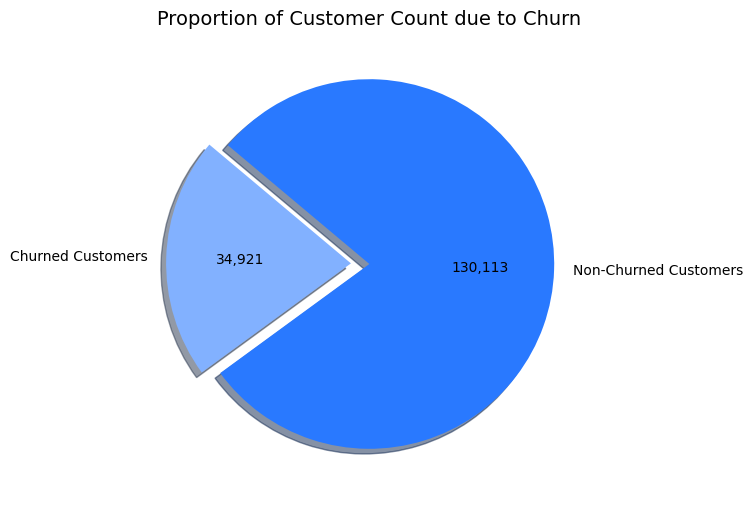

In [ ]:
import matplotlib.pyplot as plt

# Tính tổng số lượng khách hàng churn và không churn
total_churn = df[df['Exited'] == 1].shape[0]
total_non_churn = df[df['Exited'] == 0].shape[0]

# Vẽ biểu đồ tròn (pie chart)
labels = ['Churned Customers', 'Non-Churned Customers']
sizes = [total_churn, total_non_churn]
explode = (0.1, 0)  # Nhấn mạnh phần Churned Customers

# Màu sắc yêu cầu
colors = ['#82b1ff', '#2979ff']

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, labels=labels, autopct=lambda p: f'{int(p * sum(sizes) / 100):,}',
       startangle=140, explode=explode, shadow=True, colors=colors)
ax.set_title("Proportion of Customer Count due to Churn", fontsize=14)

# Hiển thị biểu đồ
plt.show()
